Mounted at /content/drive
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000 

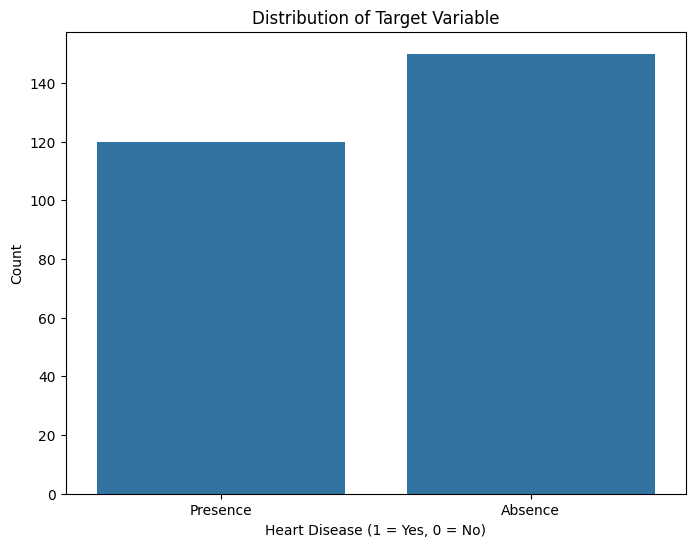

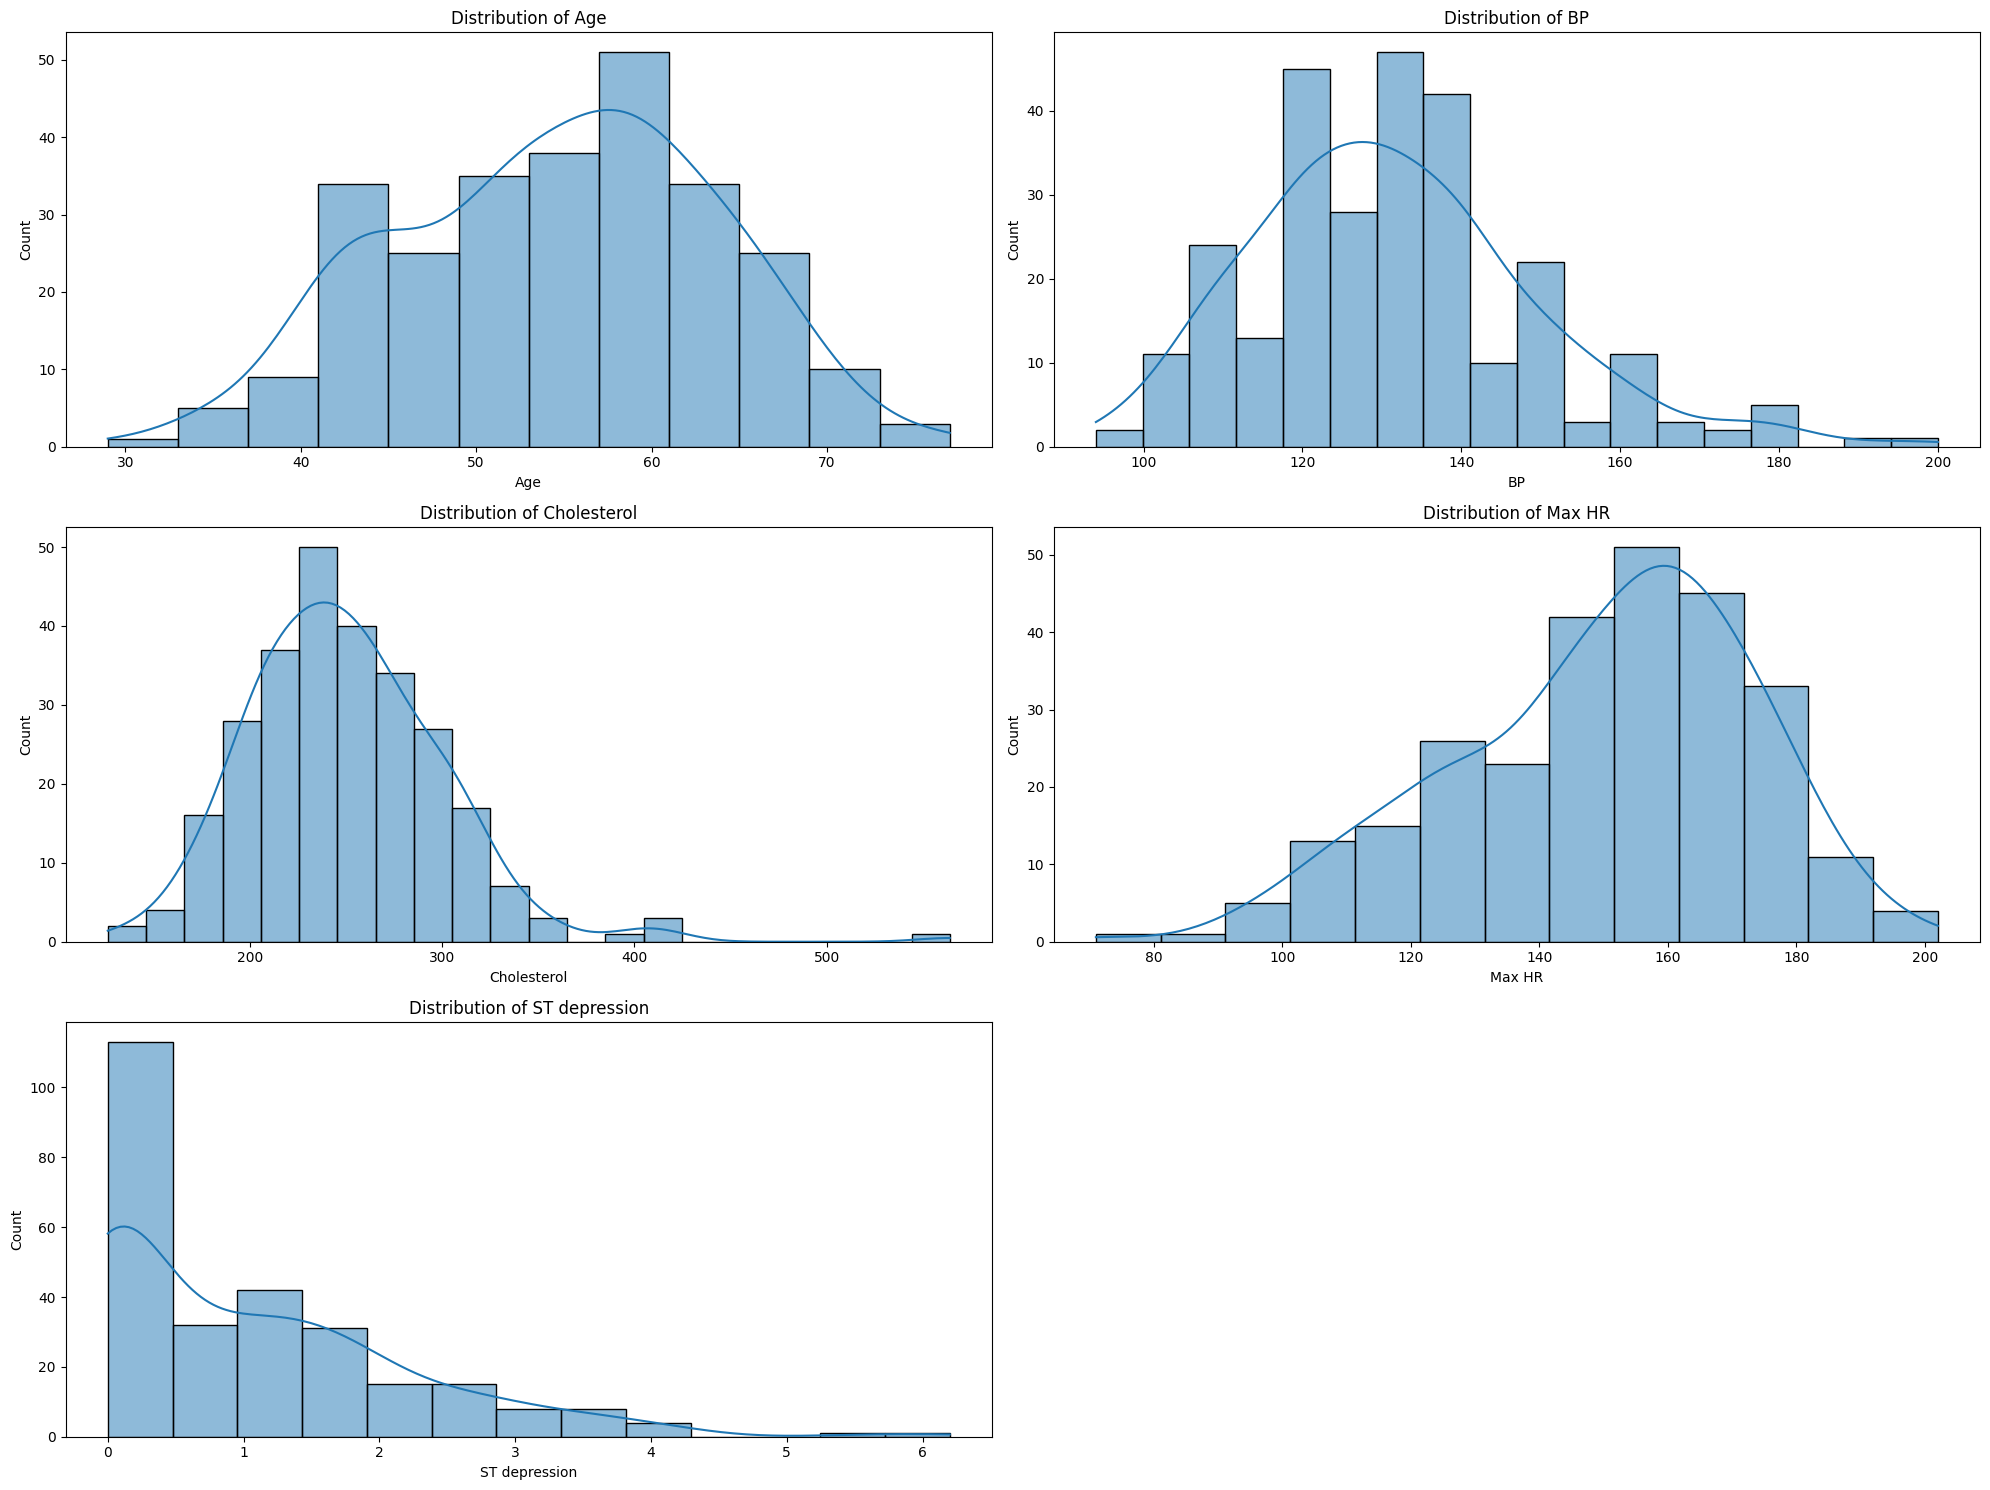

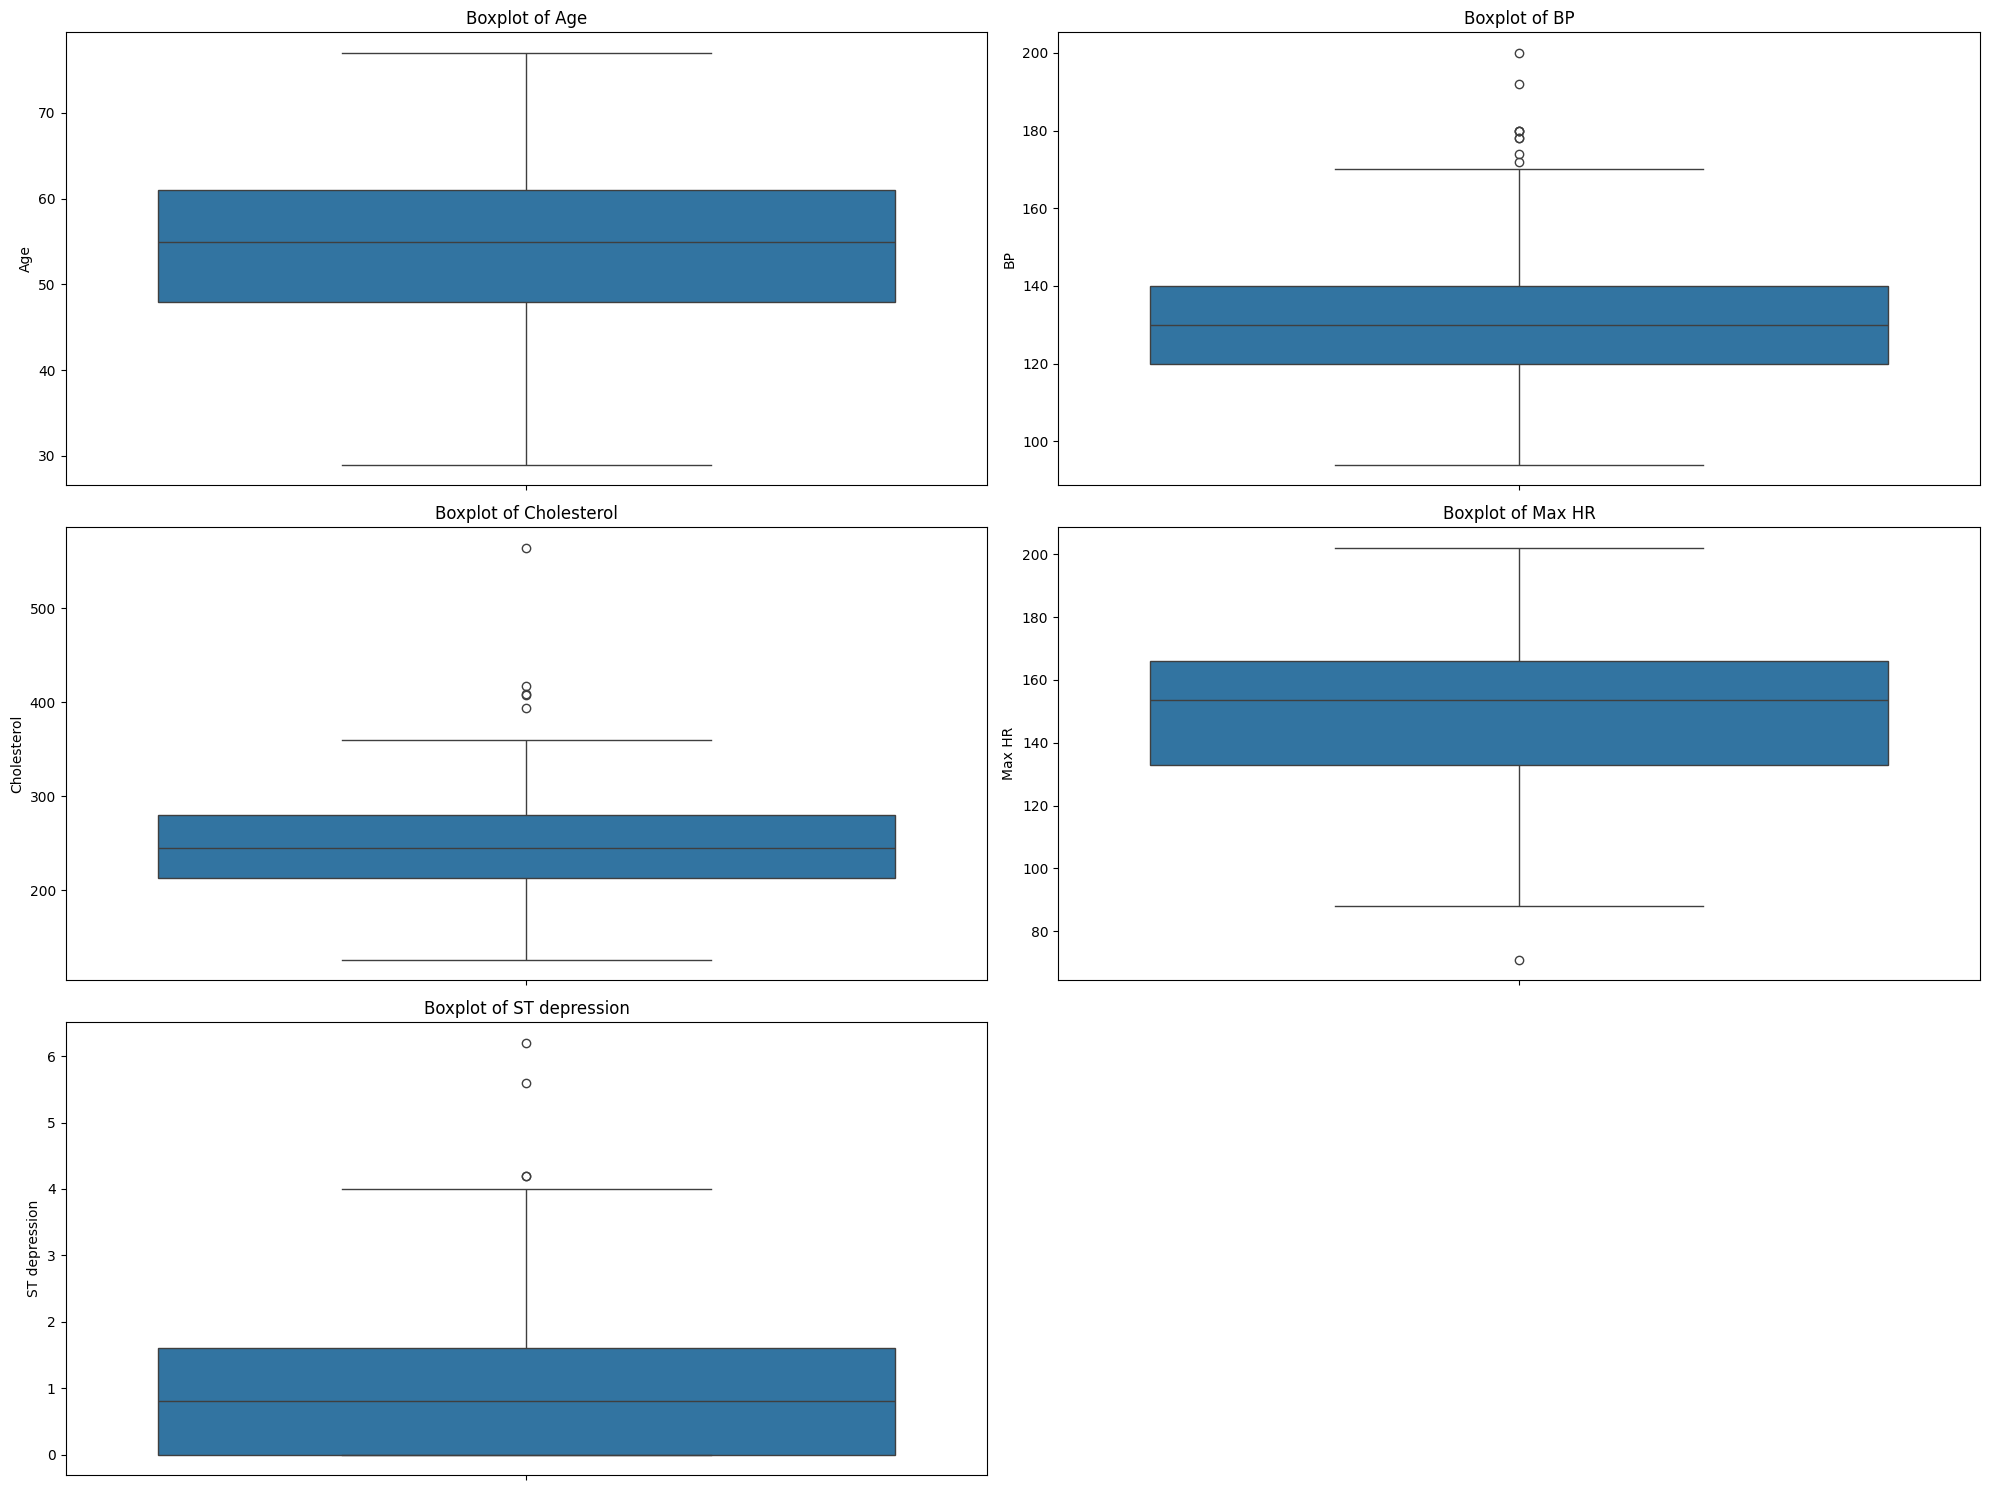

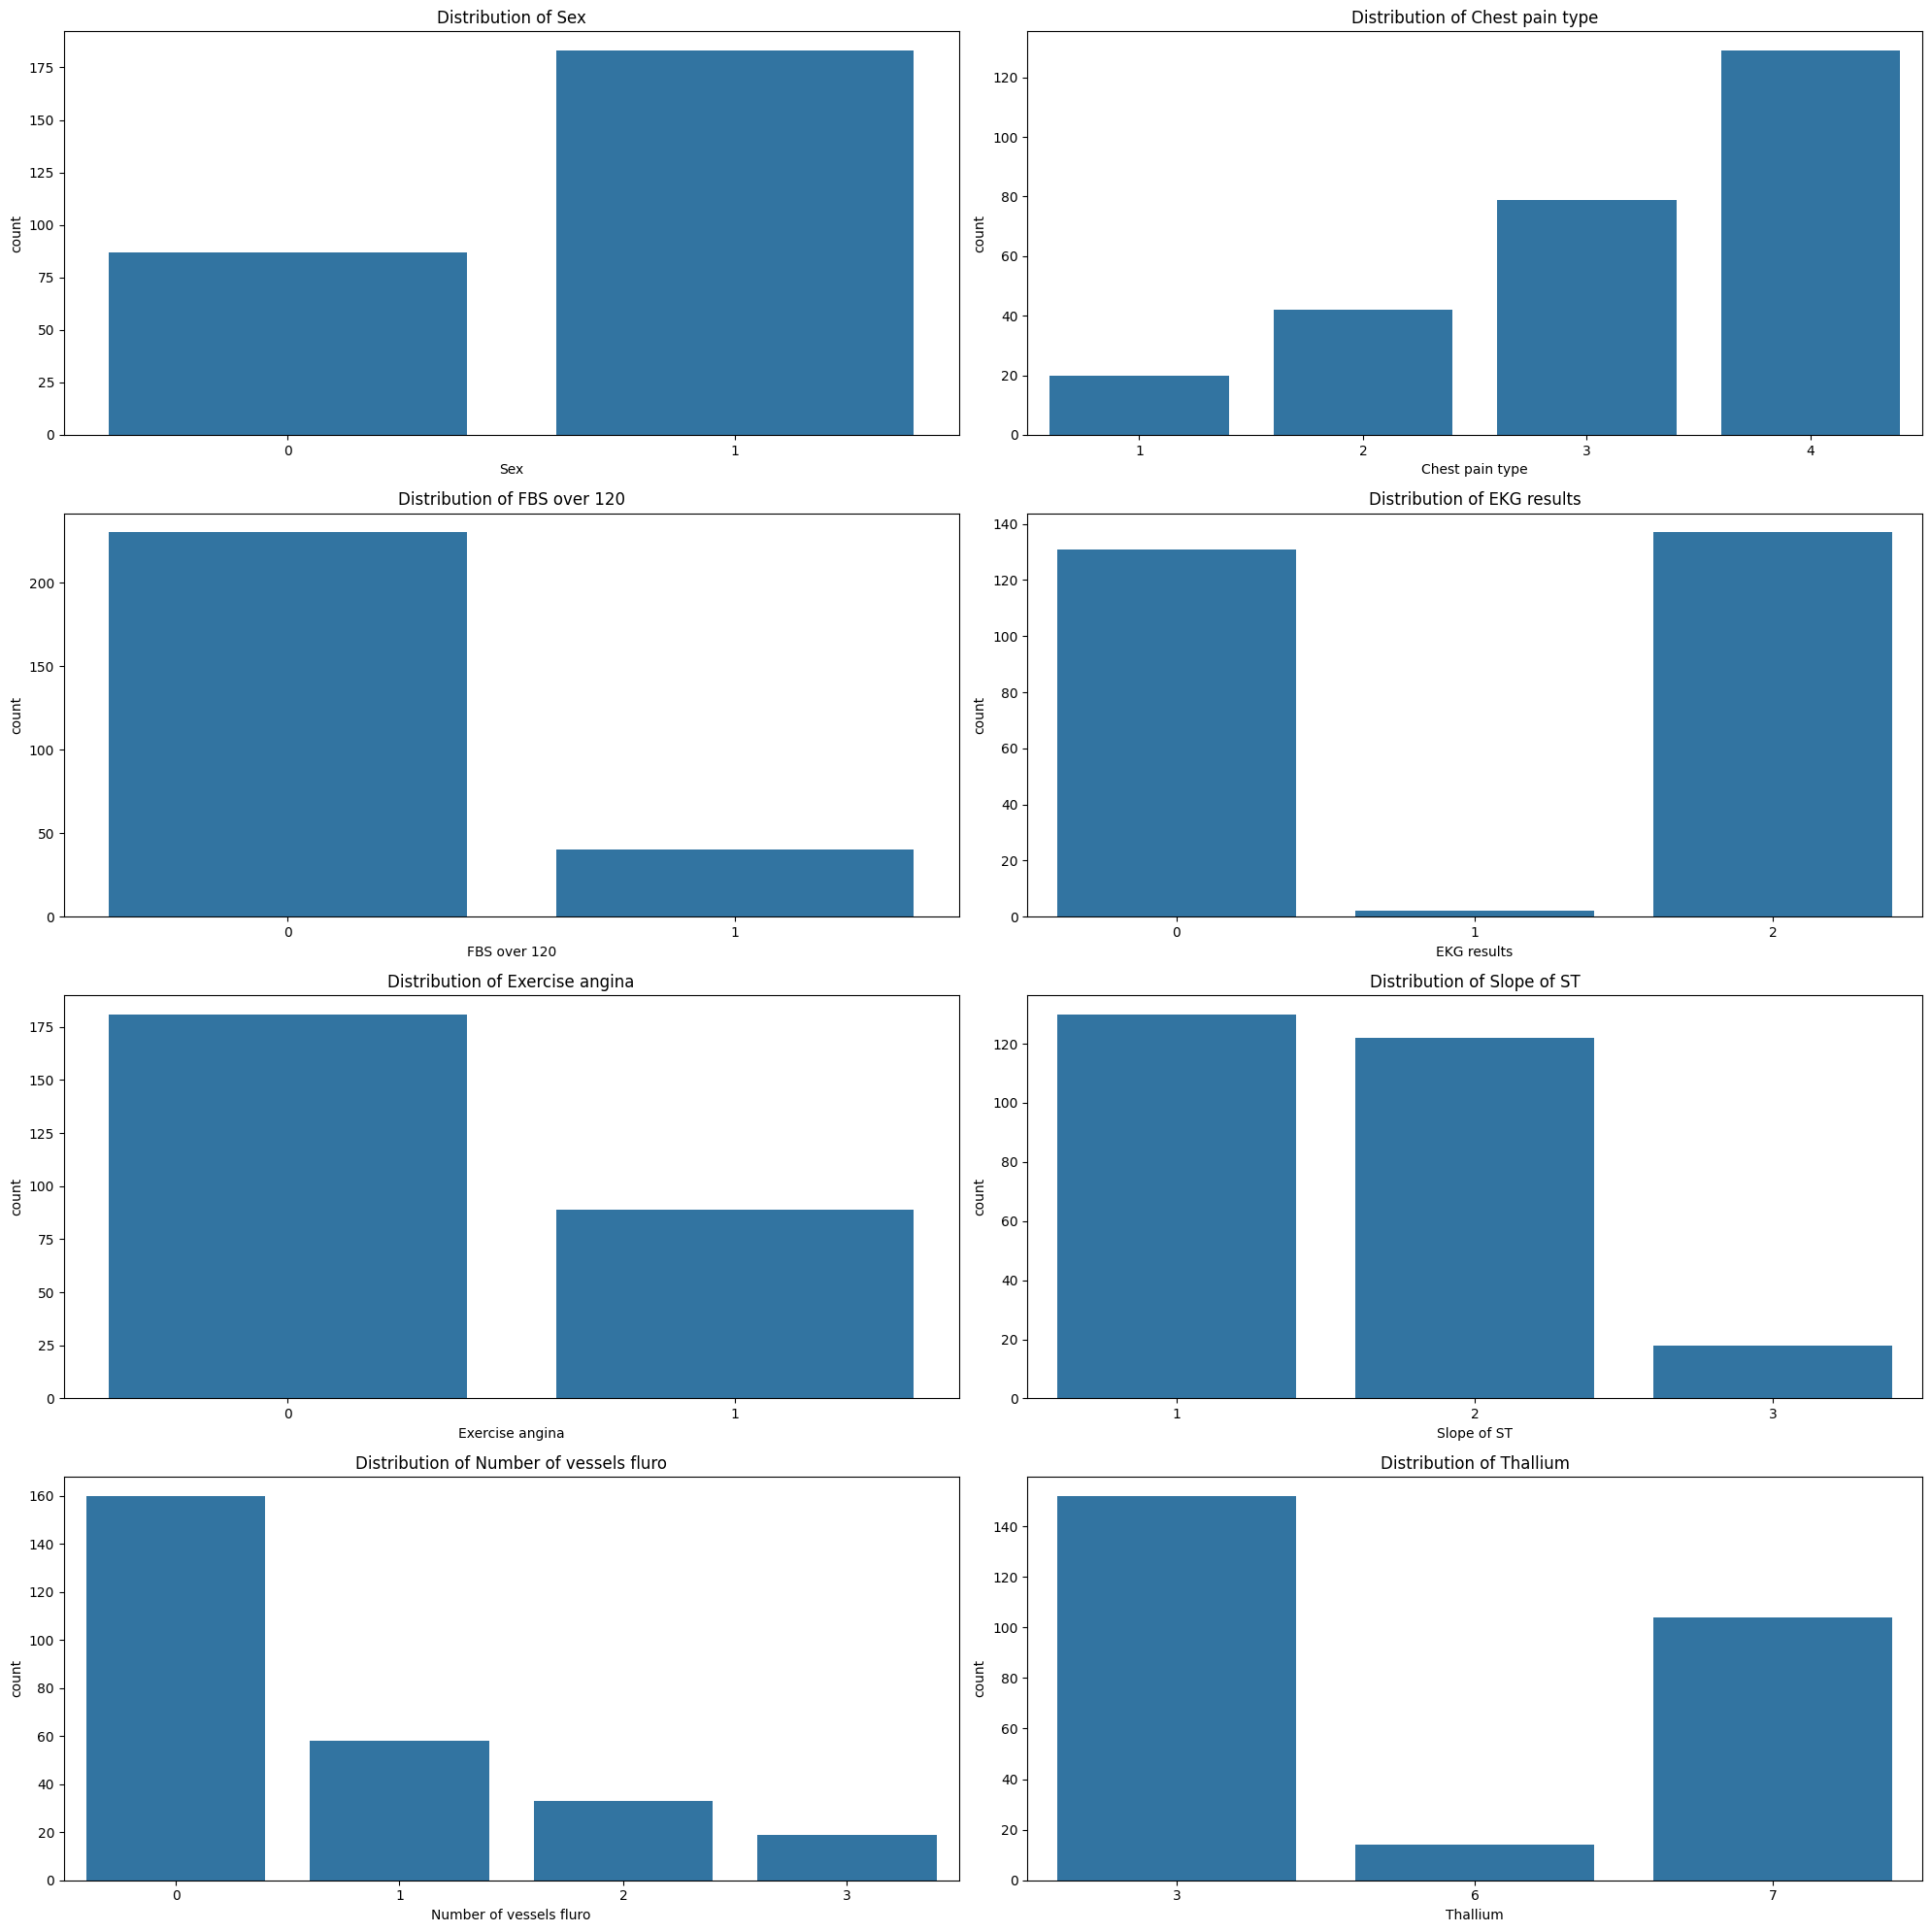

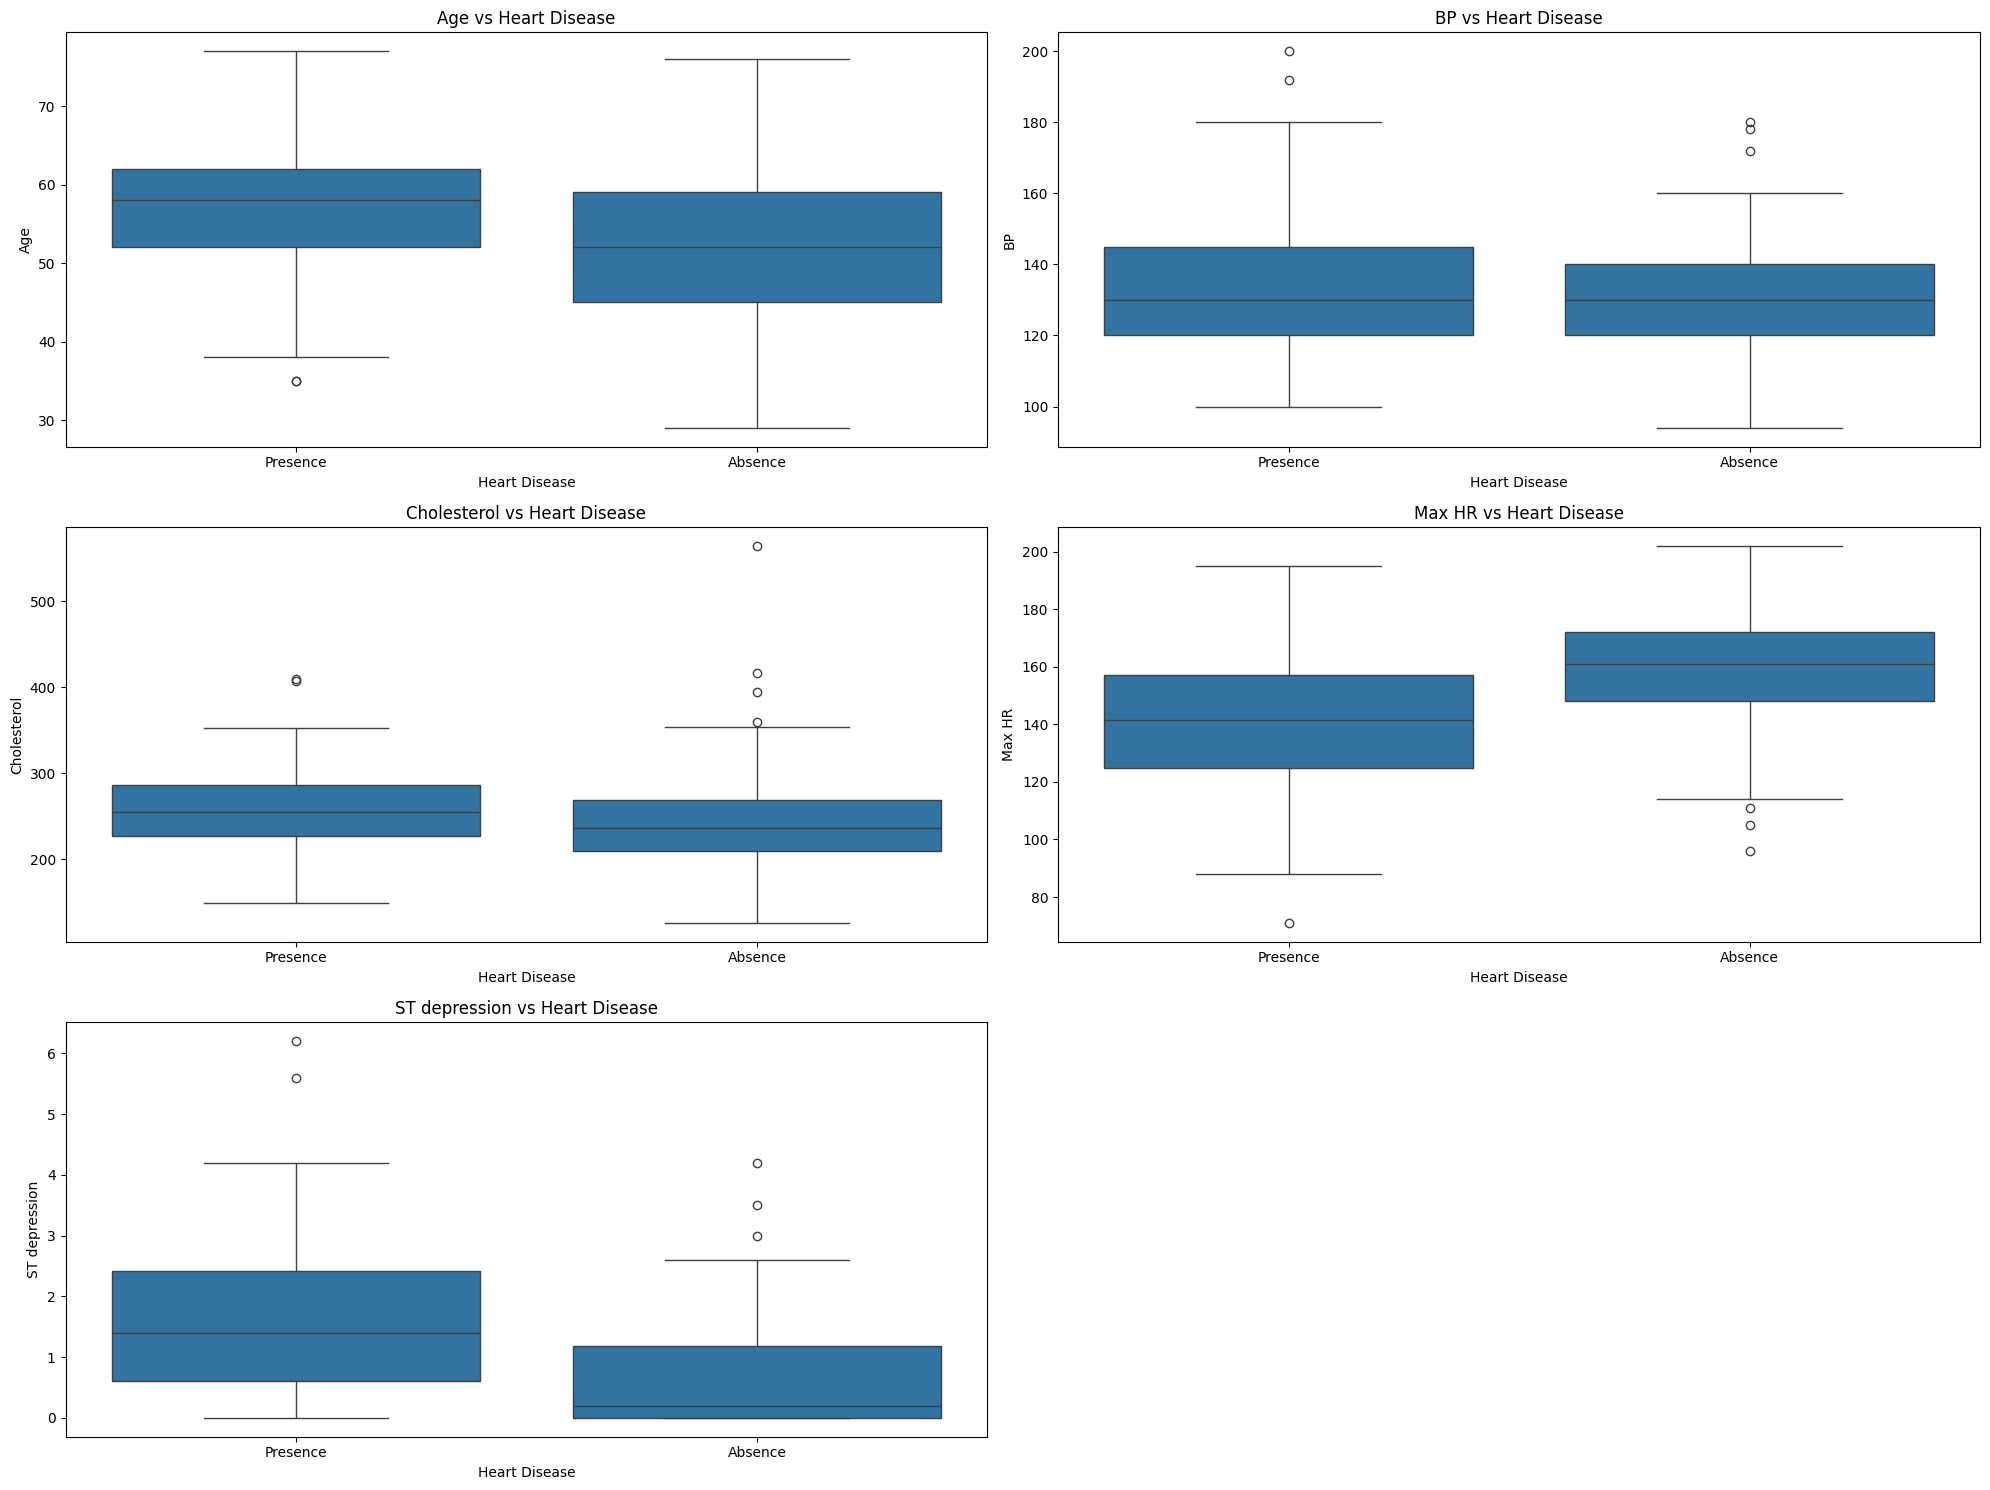

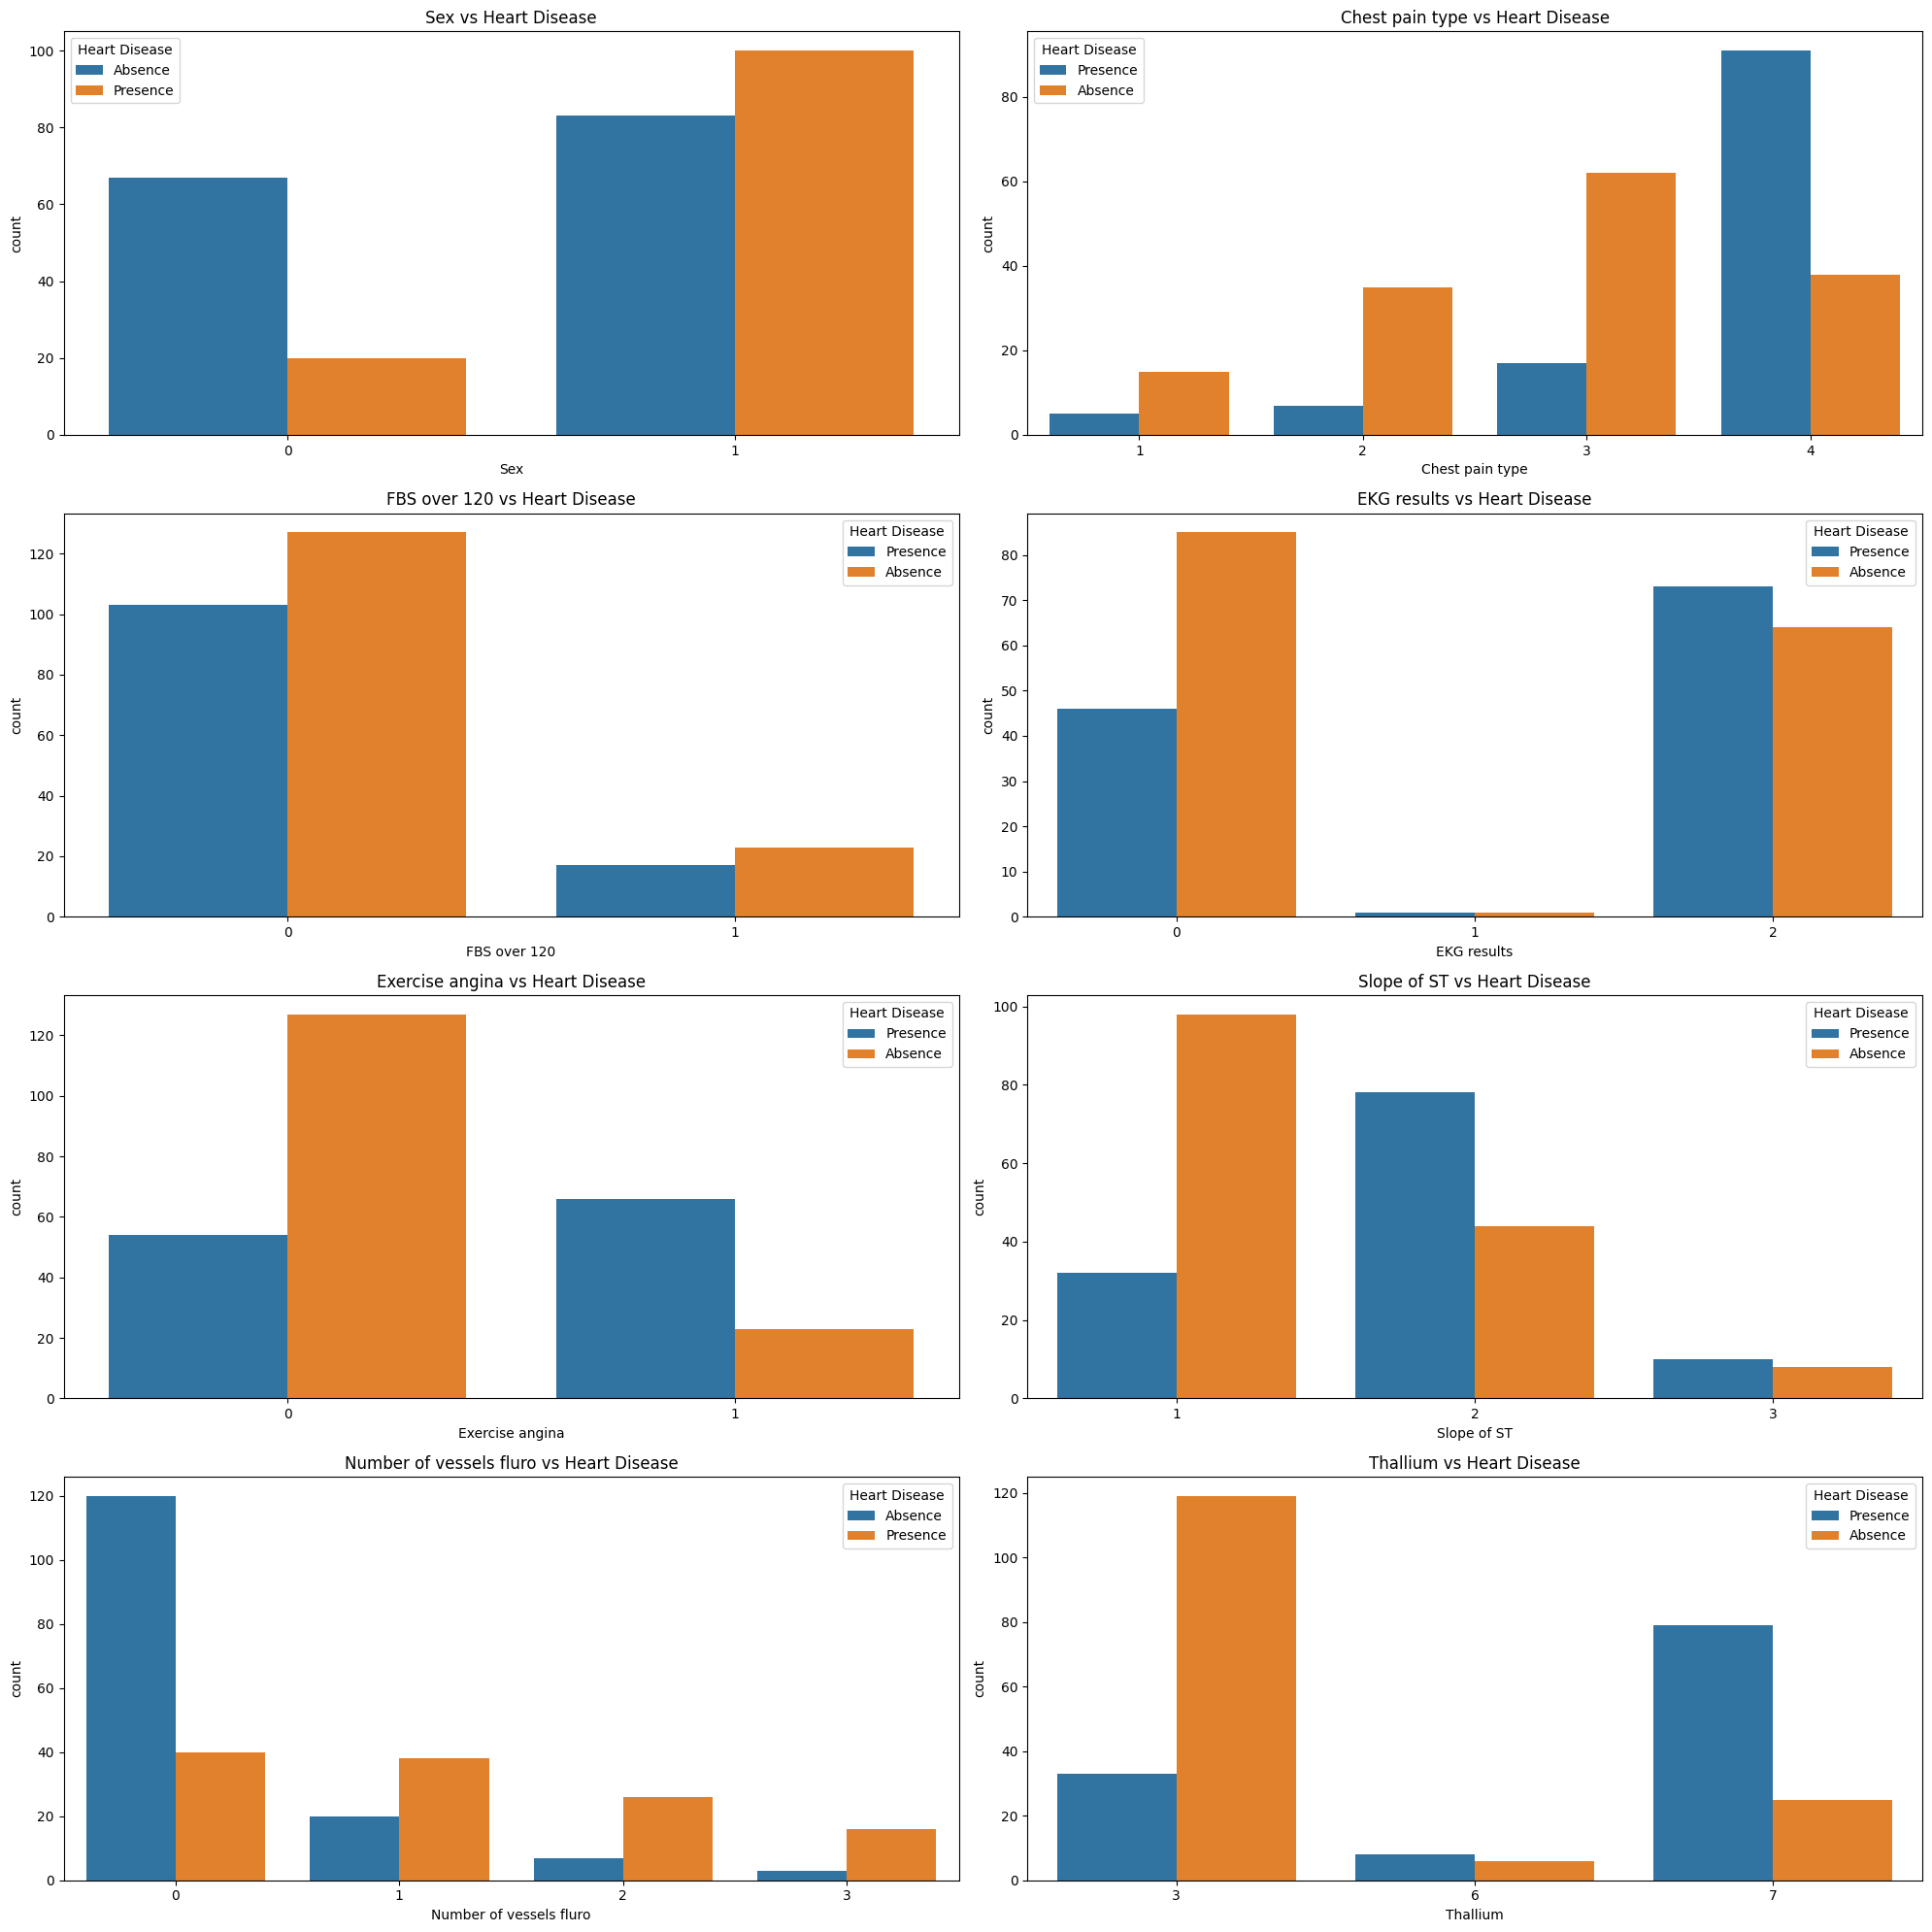

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,...,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_6,Thallium_7,Age Group_31-40,Age Group_41-50,Age Group_51-60,Age Group_61-70,Age Group_71-80,Age Group_81-90
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,Presence,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False
1,1.382140,-0.916759,6.093004,0.446409,0.481153,Absence,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,Presence,True,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,Absence,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,Absence,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler

# Load the dataset
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Colab Notebooks/Heart_Disease_Prediction.xls'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Summary statistics of the dataset
summary_statistics = df.describe()
print(summary_statistics)

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of numerical features
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Boxplots of numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Visualizing the distribution of categorical features
categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

plt.figure(figsize=(20, 20))  # Adjust the figure size if needed
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)  # Change to 4 rows by 2 columns layout
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualizing the relationships between numerical features and the target variable
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Heart Disease', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.show()

# Visualizing the relationships between categorical features and the target variable
plt.figure(figsize=(20, 20))  # Adjust the figure size if needed
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)  # Change to 4 rows by 2 columns layout
    sns.countplot(x=feature, hue='Heart Disease', data=df)
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.show()

# Feature Engineering: Creating a new feature for age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features + ['Age Group'], drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of the prepared dataset
df_encoded.head()


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.870370   0.937500  0.714286  0.810811
Decision Tree        0.648148   0.545455  0.571429  0.558140
Random Forest        0.759259   0.750000  0.571429  0.648649


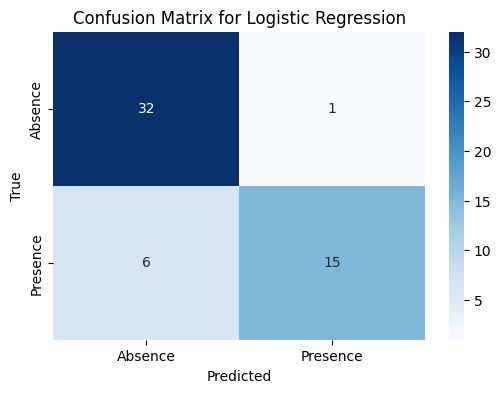

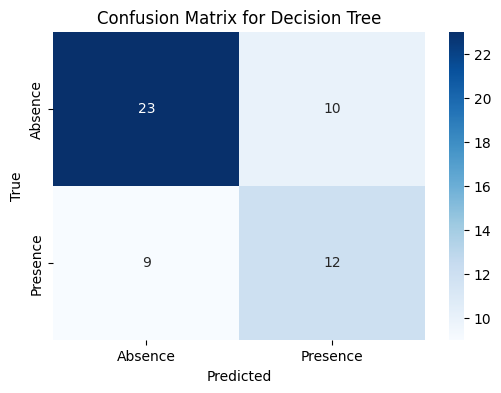

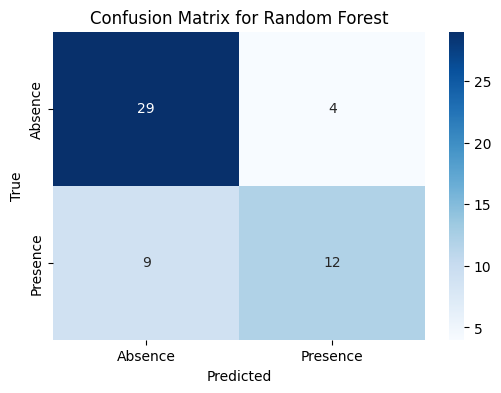

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X = df_encoded.drop('Heart Disease', axis=1)
y = df_encoded['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train the models and store their performance
model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    performance = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='Presence'),
        'Recall': recall_score(y_test, y_pred, pos_label='Presence'),
        'F1 Score': f1_score(y_test, y_pred, pos_label='Presence')
    }

    model_performance[model_name] = performance

# Display model performance
model_performance_df = pd.DataFrame(model_performance).T
print(model_performance_df)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=['Absence', 'Presence'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrices for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)
